
Sources:

https://www.kaggle.com/code/barankutluay/heart-failure-prediction-dataset 

https://towardsdatascience.com/building-a-machine-learning-pipeline-3bba20c2352b


In [ ]:
! pip install matplotlib==3.4.2  # Using version 3.4.2 of matplotlib for some of the specific matplotlib functions that I use
# You will need to restart your runtime after this step.

# Get Dataset from Kaggle

In [2]:
# Importing my dataset from Kaggle to make it easily accessible to Google Colab

! mkdir ~/.kaggle

# To get the API quote from your kaggle, go to kaggle and sign in.
# On the top right, select your profile picture, and click the 'Account' tab.
# Scroll down to the 'API' section under the 'Account' tab, and select 'Create New API Token'
# This should download a 'kaggle.json' file on to your computer. Open that file on notepad, and copy the entire file. 
# Paste the text you copied into the string in the echo command below (at which point you will un-comment / remove the three hashtags) from that command.  

### ! echo 'ENTER YOUR OWN API TOKEN HERE' > kaggle.json

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d fedesoriano/heart-failure-prediction
! unzip heart-failure-prediction.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open heart-failure-prediction.zip, heart-failure-prediction.zip.zip or heart-failure-prediction.zip.ZIP.


In [3]:
# Importing my dataset from Kaggle to make it easily accessible to Google Colab

! mkdir ~/.kaggle

# To get the API quote from your kaggle, go to kaggle and sign in.
# On the top right, select your profile picture, and click the 'Account' tab.
# Scroll down to the 'API' section under the 'Account' tab, and select 'Create New API Token'
# This should download a 'kaggle.json' file on to your computer. Open that file on notepad, and copy the entire file. 
# Paste the text you copied into the string in the echo command below (at which point you will un-comment / remove the hashtag) from that command.  

! echo '{"username":"joweriaekram","key":"7793b94a4cac14f03280db86a63b72b8"}' > kaggle.json

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d fedesoriano/heart-failure-prediction
! unzip heart-failure-prediction.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 5.69MB/s]
Archive:  heart-failure-prediction.zip
  inflating: heart.csv               


# Importing Libraries and Understanding the Data

In [2]:
# Import the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Set sns theme to your preferred color palette
#sns.set_theme(palette = "mako")

data = pd.read_csv('heart.csv')  # read csv file
df = data.copy()  # create a copy to use for future reference, so I have a copy of my original dataset when needed

everything imported


In [5]:
df.head()  # Visualize the dataset to see what your data entails through the first 5 rows
# Numerical Columns:
#   Age (years)
#   RestingBP (mmHg)
#   Cholestrol (mm/dl)
#   MaxHR (between 60 - 202)
#   Oldpeak (ST, numeric value measured in depression)

# Categorical Columns:
#   Sex (M/F)
#   ChestPainType 
#     (TA: Typical Angina, ATA: Atypical Angina, 
#      NAP: Non-Anginal Pain, ASY: Asymptomatic)
#   FastingBS (0/1) - 1 indicating if FastingBS > 120 mg/dl
#   RestingECG (Normal, ST:ST-T wave abnormality, LVH: left ventricular hypertrophy)
#   ExerciseAngina (Y/N)
#   ST_Slope (Up, Flat, Down)
#   HeartDisease (0/1) - 1 indicating heart disease


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.shape  # Will return the number of rows and columns

(918, 12)

In [7]:
df.info()  # Will inform you of the datatype of each variable, as well as if there are any null or missing values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.describe().T # Describe the data-frame (transposed) - defaults to describing only numerical
# If you want to describe all, run the following command:
# df.describe(include = "all").T


,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [9]:
df.isnull().sum()  # Checking for null values
# In this case there are no null values. If there are some, you can use a heatmap to visualize them if you want.

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Data Preparation

In [10]:
# Represent categorical data in numbers 
# Ex: the ST_Slope variable has 'Up', 'Flat', and 'Down' as it's values. 
# These will be represented by 0, 1, 2

from pandas.core.arrays import categorical 

# These are the variables I classified as categorical/binary that needed to be coded

categorical_data = ["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]

codes = {}  # Create a dictionary to store the codes of the conversion
for i in df:  # For each variable in the data frame 
  if i in categorical_data:  # For each variable that was classified as categorical
    specific_codes = {}  # Create a dictionary for that variable's code conversion 
    df[i] = df[i].astype("category")  # Convert that variable from 'object' datatype to category
    df[i] = df[i].cat.codes  # Create codes for the categories and replace in the dataset 
    coded = df[i].unique()  # Get the unique values (the codes) from the variable
    count = 0  # Count initialized. Later used for accessing specific indexes
    for j in data[i].unique():  # For each unique value
      specific_codes[j] = coded[count]  # Create an item in the dictionary with the value, and tell it which code correlates
      count += 1  # Count incremented
    codes[i] = specific_codes  # Create a new item in the overall dictionary with the dictionary created for this specific variable's codes


# View our created dictionary:
for i in codes:
  print("{} -".format(i))
  for j in codes[i]:
    print("{}: {}".format(j, codes[i][j]))
  print()

# These are the variables I classified as categorical/binary
categorical_data = ["Sex","ChestPainType","FastingBS","RestingECG","ExerciseAngina","ST_Slope","HeartDisease"]


Sex -
M: 1
F: 0

ChestPainType -
ATA: 1
NAP: 2
ASY: 0
TA: 3

RestingECG -
Normal: 1
ST: 2
LVH: 0

ExerciseAngina -
N: 0
Y: 1

ST_Slope -
Up: 2
Flat: 1
Down: 0



In [11]:
# Revisualize the now coded dataset
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [12]:
# Revisualize the now coded dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
Sex,918.0,0.789760,0.407701,0.0,1.00,1.0,1.0,1.0
ChestPainType,918.0,0.781046,0.956519,0.0,0.00,0.0,2.0,3.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
RestingECG,918.0,0.989107,0.631671,0.0,1.00,1.0,1.0,2.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
ExerciseAngina,918.0,0.404139,0.490992,0.0,0.00,0.0,1.0,1.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


# Understanding Variable Correlations

In [13]:
from sklearn.feature_selection import SelectKBest, chi2

fs_data = df.copy() # copy of dataset for feature selection
x = fs_data.iloc[:, 0:11]  # independent variables
y = fs_data.iloc[:, -1]    # target column / what we're trying to predict

# Transforming Old Peak to be positive by shifting it by 2.6 
x['Oldpeak'] = [i + 2.6 for i in x['Oldpeak']]

# Using SciKit Learn's Feature Selection 
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(x, y)


# Creating a vertical pandas data frame with the scores and variable names
fs_scores = pd.DataFrame(fit.scores_)
fs_cols = pd.DataFrame(x.columns)
featured = pd.concat([fs_cols, fs_scores], axis = 1)

# Giving the Columns appropriate titles
featured.columns = ['Variable', 'Scores']

# Sorting by descending order
total = len(featured['Variable'])
print(featured.nlargest(total, 'Scores'))

          Variable       Scores
4      Cholesterol  2989.558811
7            MaxHR   696.650396
2    ChestPainType   160.736878
8   ExerciseAngina   133.640134
0              Age   121.285338
10        ST_Slope    77.486680
5        FastingBS    50.296983
9          Oldpeak    48.809876
3        RestingBP    27.481227
1              Sex    18.006243
6       RestingECG     1.218136


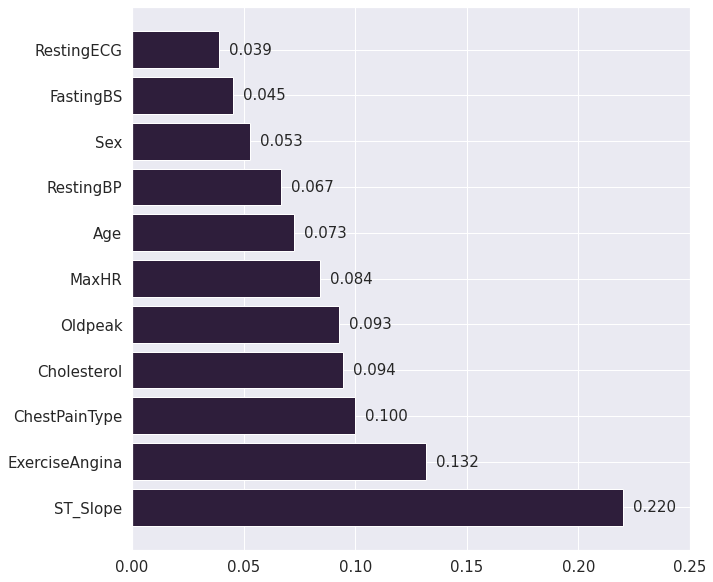

In [14]:
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
import warnings

# Model Extra Tree Classifier - to learn more about it: https://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeClassifier.html
model = ExtraTreesClassifier()
model.fit(x, y)

# Create a pandas series of the feature importance, and sorted in descending order
imp = pd.Series(model.feature_importances_, index = x.columns)
sorted = imp.nlargest(total)

with warnings.catch_warnings():  # There was a function I used here that matplotlib did not appreciate, 
  warnings.simplefilter("ignore")  # so I ignored the warnings. You don't have to worry about that though.

  fig, ax = plt.subplots(figsize=(10, 10))  # Creates the general image size, empty plot
  plt.xticks(fontsize = 15)  # controls the labels on the x axis
  bars= ax.barh(sorted.index, sorted.values)  # Creates the horizontal bar graph based on the data
  ax.set_yticklabels(sorted.index, fontsize = 15)  #controls the labels on the y axis
  ax.bar_label(bars, fmt='%.3f', fontsize = 15, padding = 10)  # Labels the exact value of each variable on the bar graph
  ax.set_xlim(right=0.250)  # Extends the right x limit to inlcude 0.250 so the bar for ST_Slope isn't cut off


plt.show()  # Shows the graph created

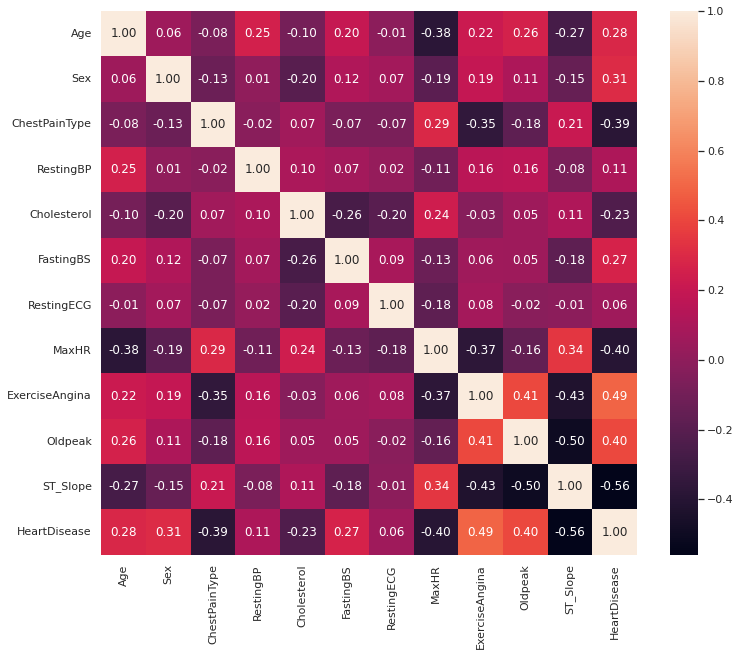

In [15]:
plt.figure(figsize=(12,10))  # Creates the general figure with the specified size

# Uses sns aesthetics to create a heatmap using the .corr function, annotated to include the values, formatted to the second decimal point
sns.heatmap(df.corr(), annot=True,fmt='.2f');  # The .corr function finds the correlations between ALL the variables in a dataframe


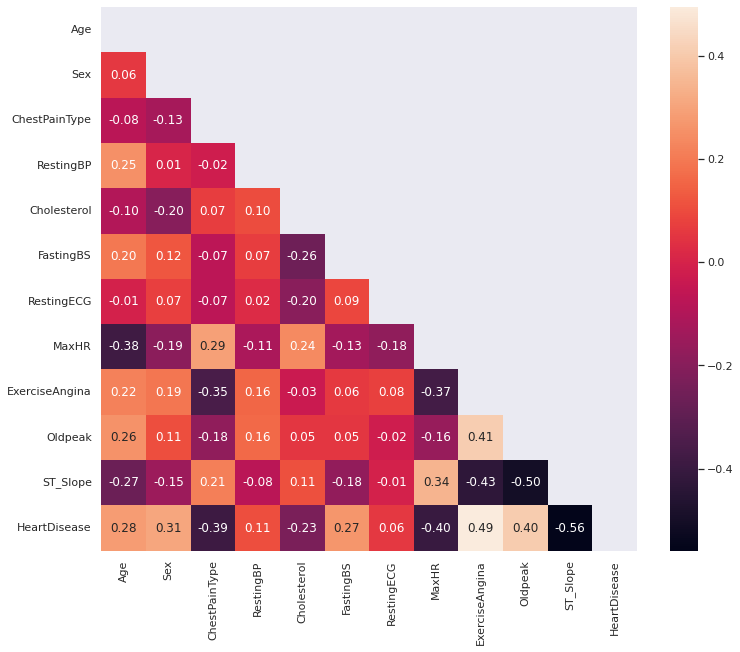

In [16]:
plt.figure(figsize=(12,10)) # Creates the general figure with the specified size
mask = np.triu(df.corr()) # Keeps only the upper triangle, as the lower triangle had repetitive information

# Uses sns aesthetics to create a heatmap using the .corr function, annotated to include the values, formatted to the second decimal point
sns.heatmap(df.corr(), mask=mask, annot=True,fmt='.2f');

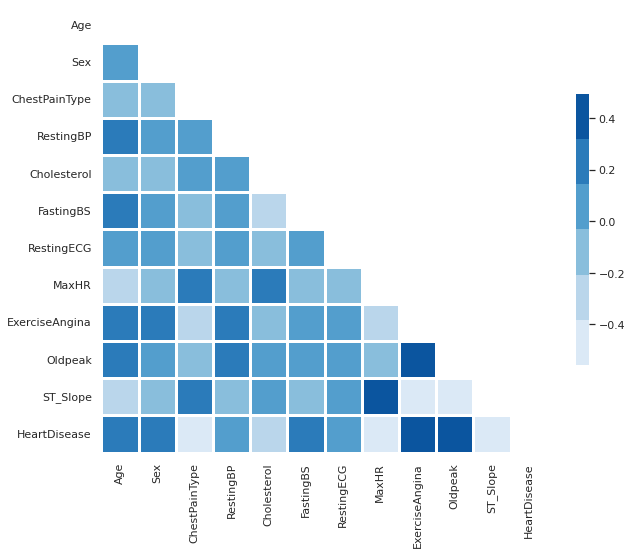

In [17]:
sns.set_theme(style="white")  # Set the theme to white to change the aesthetic of this plot as an example.

plt.figure(figsize=(10,10)) # Creates the general figure with the specified size
mask = np.triu(df.corr()) # Keeps only the upper triangle, as the lower triangle had repetitive information

# Uses sns aesthetics to create a heatmap using the .corr function, no annotations, chose the color palette to be blues
# Changed specifc display features such as line width and the color bar size

sns.heatmap(df.corr(), mask=mask, square=True, annot=False, cmap=sns.color_palette("Blues"), linewidths=3, cbar_kws={"shrink": .5});

# Data Analysis and Visualization

## Individual Variables Analysis


In this dataset, 25.91% of women had heart disease, as compared to 63.17% of the men.


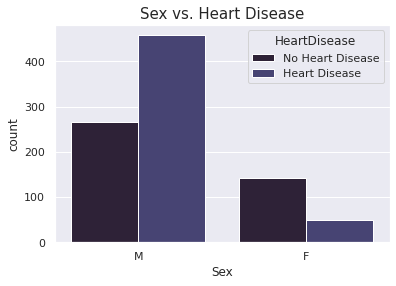

In [18]:
sns.set_theme(palette = "mako", style="darkgrid")  # Setting sns theme to mako (just an aesthetic choice)
df2 = data.copy()  # Copying the data so I don't change the original dataset

f_hd = ((df2['Sex']=="F") & (df2['HeartDisease']==1)).sum()  # Counting how many rows were both female and positive for heart disease
f = (df2['Sex']=="F").sum()  # Counting how many rows were female
c_fhd = (f_hd/f) * 100  # Calculating the percentage of females with heart disease compared to the overall female population in the dataset

m_hd = ((df2['Sex']=="M") & (df2['HeartDisease']==1)).sum()  # Counting how many rows were both male and positive for heart disease
m = (df2['Sex']=="M").sum()  # Counting how many rows were male
c_mhd = (m_hd/m) * 100  # Calculating the percentage of females with heart disease compared to the overall female population in the dataset

# Printing the calculation to the second decimal point.
print("In this dataset, {:.2f}% of women had heart disease, as compared to {:.2f}% of the men.".format(c_fhd, c_mhd))  


df2.HeartDisease = df2.HeartDisease.map({1:"Heart Disease", 0:"No Heart Disease"})  # mapping the Heart Disease code back
sns.countplot(data=df2, x='Sex',hue='HeartDisease')  # Using the countplot to separate based on Heart Disease
plt.title("Sex vs. Heart Disease", fontsize= 15);  # Sets the title 


(734, 11) (734,)
(184, 11) (184,)
###############################################3


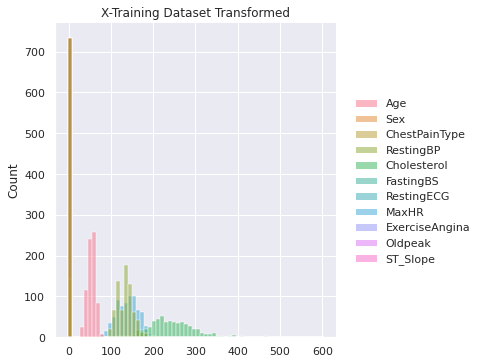

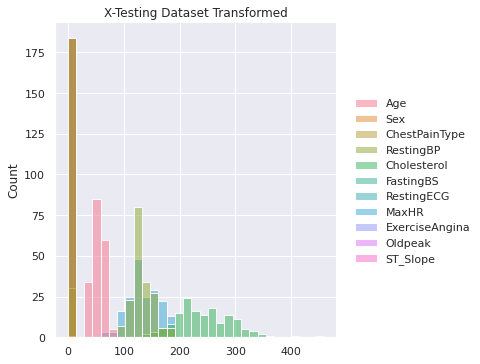

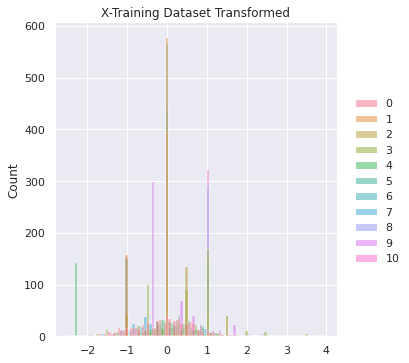

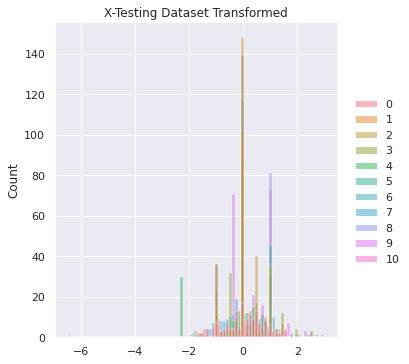

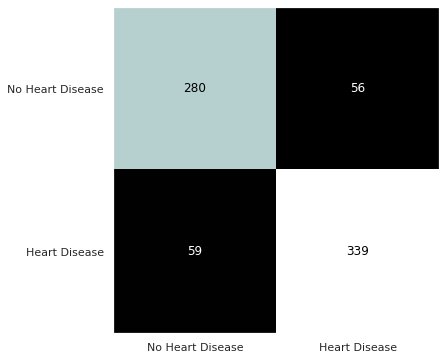

84.33242506811989
84.25460636515913


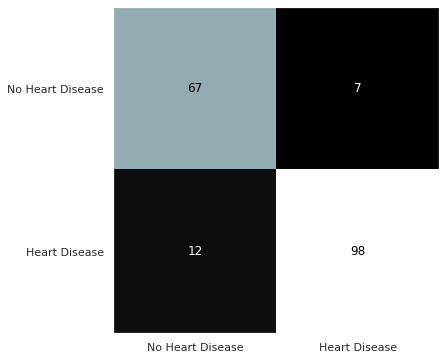

89.67391304347827
89.81572481572482


In [21]:
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



fs_data = df.copy()
x = fs_data.iloc[:, 0:11]  # independent variables
y = fs_data.iloc[:, -1]    # target column / what we're trying to predict


x_training, x_testing, y_training, y_testing = train_test_split(x, y, test_size = 0.2, random_state = 1) # splitting up dataset to training and testing

print(x_training.shape, y_training.shape)
print(x_testing.shape, y_testing.shape)
print("###############################################3")

sns.displot(x_training); # View training dataset
plt.title("X-Training Dataset Transformed");
plt.show()
print()

sns.displot(x_testing); # View testing dataset
plt.title("X-Testing Dataset Transformed")
plt.show()
print()


scl = RobustScaler() # Preprocess numerical data 
x_training = scl.fit_transform(x_training) 
x_testing = scl.transform(x_testing)

sns.displot(x_training); # View data after preprocessing
plt.title("X-Training Dataset Transformed");
plt.show()
print()

sns.displot(x_testing); # View data after preprocessing
plt.title("X-Testing Dataset Transformed")
plt.show()
print()


model = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', random_state=1) # Model chosen for machine learning
lgfit = model.fit(x_training, y_training)

hd_pred = model.predict(x_training) # Predicting output using training data

cm = confusion_matrix(y_training, hd_pred) # Creating a confusion matrix to compare how the prediction went 

# Plotting confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm, cmap="bone")

ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('No Heart Disease', 'Heart Disease'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No Heart Disease', 'Heart Disease'))
ax.set_ylim(1.5, -0.5)
colors_choose = ["black", "white", "white", "black"]
c = 0
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color=colors_choose[c])
        c+=1
plt.show()

# Printing the accuracy score for the training dataset 

print(accuracy_score(y_training, hd_pred)*100)

print(balanced_accuracy_score(y_training, hd_pred)*100) # If the dataset might be imbalanced (outliers etc.), you can use a different accuracy method in scikit learn


hd_pred_check = model.predict(x_testing) # Prediciting on Testing dataset


cm = confusion_matrix(y_testing, hd_pred_check) # Creating a confusion matrix to compare how the prediction went 

# Plotting confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm, cmap="bone")

ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('No Heart Disease', 'Heart Disease'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('No Heart Disease', 'Heart Disease'))
ax.set_ylim(1.5, -0.5)
colors_choose = ["black", "white", "white", "black"]
c = 0
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color=colors_choose[c])
        c+=1
plt.show()

# Printing the accuracy score for the testing dataset 

print(accuracy_score(y_testing, hd_pred_check)*100)
print(balanced_accuracy_score(y_testing, hd_pred_check)*100)# If the dataset might be imbalanced (outliers etc.), you can use a different accuracy method in scikit learn
